# CSC 792 Assignment 3 - Backpropagation Algorithm

## Mangesh Sakordekar (7440013)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Activation Functions

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
def doNothing(x):
    return x

### Plotting Functions

In [4]:
def plot3dgraph(surface):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(surface[0], surface[1], surface[2], cmap='viridis')
    ax.set_title('Model Surface')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('y')
    
    plt.show()

In [5]:
def plot2dgraph(surface):
    plt.contourf(surface[0], surface[1], surface[2], levels=28)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.title('Model Surface')
    plt.colorbar()
    plt.show()

### Model Class

In [6]:
class Model:
 
    ########################### Variables ######################################
    weights = [ np.array([[1, 1, 1], [-1, -1, -1]]).T, np.array([1, -1, 1]).T]
    bias = [1,1]
    functs = [sigmoid, doNothing]
    learning_rate = 0.1
    
    epochs = 200000
    train_data = [np.array([0, 0]).T, np.array([1, 0]).T, np.array([0, 1]).T, np.array([1, 1]).T]
    train_labels = [1, 0, 0, 1]
    
    
    ######################### Helper Functions #####################################
    def reset(self):
        self.weights = [ np.array([[1, 1, 1], [-1, -1, -1]]).T, np.array([1, -1, 1]).T]
        self.bias = [1,1]
        self.functs = [sigmoid, doNothing]
        self.learning_rate = 0.1
        
    def resetTrainData(self, data, labels):
        self.train_data = data
        self.train_labels = labels
        
    def setEpochs(self, epoc):
        self.epochs = epoc
        
    def setLearningRate(self, lr):
        self.learning_rate = lr
        
    
    ############################ Forward Pass ################################
    def forwardPass(self, inputs):
        outputs = []

        inp = np.insert(inputs, 0, self.bias[0])

        outputs.append(inp)

        for i in range(0, len(self.weights)):
            a = np.dot(outputs[i], self.weights[i])
            o = self.functs[i](a)

            if i+1 < len(self.bias):
                o = np.insert(o, 0, self.bias[i+1])

            outputs.append(o)

        return outputs
    
    
    def predict(self, inputs):
        outputs = self.forwardPass(inputs)
        return outputs[2]
    
    
    ########################## Backwards Pass ####################################
    def backwardPass(self, outputs, exp_out):
        errors = self.calcErrors(outputs, exp_out)

        deltas = self.calcDeltas(outputs, errors)
        return deltas
    
    
    def calcErrors(self, outs, exp_out):
        errors = []

        eo = [outs[-1] - exp_out]
        errors.append(eo)

        i = len(outs) - 2

        while i > 0:

            el = []
            j = 1

            while j < len(outs[i]):
                er = outs[i][j] * (1-outs[i][j]) * self.weights[i][j] * errors[0][0]
                el.append(er)
                j+=1

            errors.insert(0, el)
            i-=1

        return errors
    
    
    def calcDeltas(self, outs, errors):
        deltas = []
        for i in range(0, len(self.weights)):
            dlts = np.zeros(self.weights[i].shape)
            for j in range(0, dlts.shape[0]):
                if self.weights[i].ndim > 1:
                    for k in range(0, dlts.shape[1]):
                        dlts[j,k] = -1 * self.learning_rate * errors[i][k] * outs[i][j]
                else:
                    dlts[j] = -1 * self.learning_rate * errors[i][0] * outs[i][j]

            deltas.append(dlts)

        return deltas
 

    ########################## Training Options #######################################
    def trainManual(self, inputs, ans):  
        prev = 100
        preds = []
        while True:
            outs = self.forwardPass(inputs)
            preds.append(outs[2])
            deltas = self.backwardPass(outs, ans)

            for j in range(0, len(self.weights)):
                self.weights[j] = self.weights[j] + deltas[j]

            if abs(prev - outs[2]) == 0:
                break
            prev = outs[2]
        return self.weights, preds
    
    def train(self):
        for i in range(0, self.epochs):
            for ind in range(0, len(self.train_data)):
                outs = self.forwardPass(self.train_data[ind])
                deltas = self.backwardPass(outs, self.train_labels[ind])

                for j in range(0, len(self.weights)):
                    self.weights[j] = self.weights[j] + deltas[j]

        return self.weights
        
    

In [7]:
model = Model()

### Forward and Backward Pass for (0.25, 0.75)

Checking output for forward and backwards pass against calculations done by hand.

In [8]:
model.reset()
forwardpass_check = model.forwardPass(np.array([0.25, 0.75]).T)
forwardpass_check

[array([1.  , 0.25, 0.75]),
 array([1.        , 0.88079708, 0.11920292]),
 0.23840584404423526]

In [9]:
backwardpass_check = model.backwardPass(forwardpass_check, 0)
backwardpass_check

[array([[ 0.00250311, -0.00250311],
        [ 0.00062578, -0.00062578],
        [ 0.00187733, -0.00187733]]),
 array([-0.02384058, -0.02099872, -0.00284187])]

### Train the Model and Display Final Weights

In [10]:
model.reset()
model.train()

[array([[-1.85185461,  0.19857669],
        [ 1.51386759, -5.75476816],
        [ 1.51002081, -5.56127349]]),
 array([-1.22711622,  2.91687027,  3.33300892])]

### Plot on range of [0,1]

In [11]:
xx, yy = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50), indexing="xy")
xy = np.dstack((xx, yy))

In [12]:
zz = np.ndarray((50 , 50))
for i in range(0, 50):
    for j in range(0, 50):
        zz[i][j] = model.predict(xy[i][j])

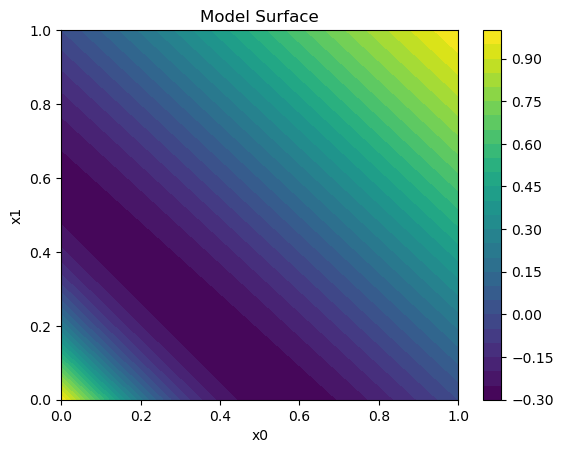

In [13]:
plot2dgraph([xx,yy,zz])

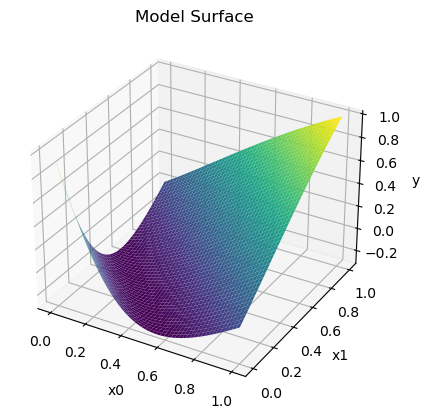

In [14]:
plot3dgraph([xx,yy,zz])

### Testing Final Weights

In [15]:
tests = [np.array([1, 1]).T, np.array([1, 0]).T, np.array([0, 1]).T, np.array([0, 0]).T]
ans = [1, 0, 0, 1]

In [17]:
for inp in tests:
    print(model.predict(inp))

0.9999999999999984
1.1102230246251565e-15
1.5543122344752192e-15
1.0
